In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl

In [2]:
quandl.ApiConfig.api_key = 

# Importing our data
data2 = quandl.get("FRED/DCOILBRENTEU", start_date="1987-5-20", end_date="2022-9-01")

<AxesSubplot:xlabel='Date', ylabel='Crude Oil Prices: Brent - Europe'>

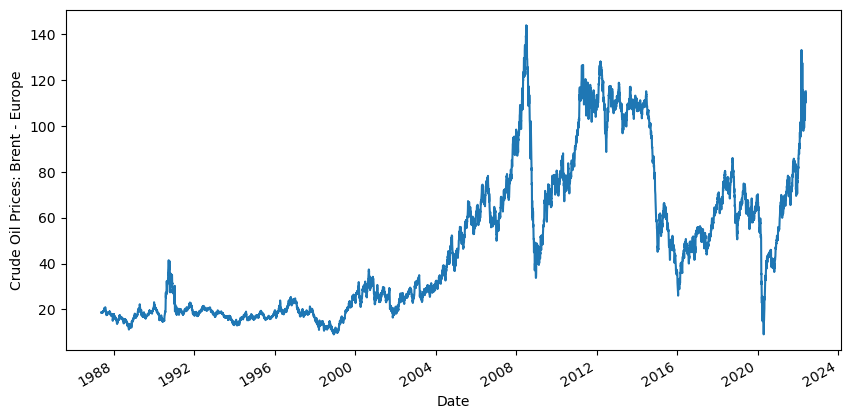

In [3]:
plt.ylabel("Crude Oil Prices: Brent - Europe")

# Setting the size of our graph
data2.Value.plot(figsize=(10,5))

In [4]:
data2['MA1'] = data2['Value'].shift(1).rolling(window=1).mean()
data2['MA2']= data2['Value'].shift(1).rolling(window=2).mean()

In [5]:
data2 = data2.dropna()

# Initialising X and assigning the two feature variables
X = data2[['MA1','MA2']]

# Getting the head of the data
X

,MA1,MA2
Date,,
1987-05-22,18.45,18.540
1987-05-25,18.55,18.500
1987-05-26,18.60,18.575
1987-05-27,18.63,18.615
1987-05-28,18.60,18.615
...,...,...
2022-05-17,114.86,113.490
2022-05-18,112.89,113.875
2022-05-19,110.04,111.465


In [6]:
y = data2['Value']

# Getting the head of the data
y.head()

Date
1987-05-22    18.55
1987-05-25    18.60
1987-05-26    18.63
1987-05-27    18.60
1987-05-28    18.60
Name: Value, dtype: float64

In [7]:
training = 0.8
t = int(training*len(data2))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]

In [8]:
model = LinearRegression().fit(X_train,y_train)

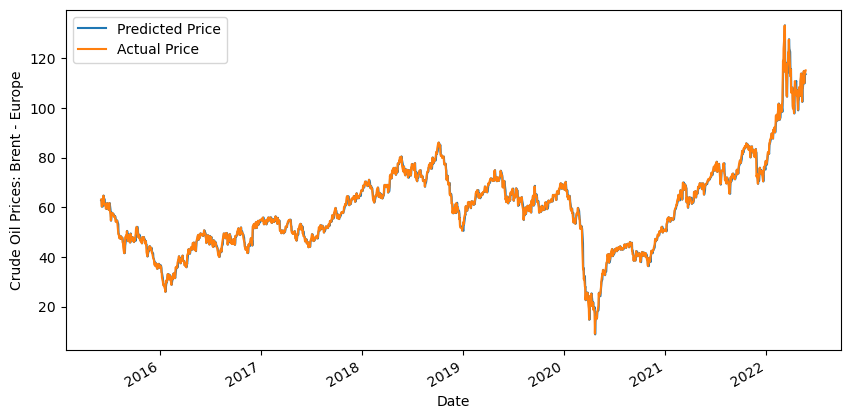

In [9]:
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Crude Oil Prices: Brent - Europe")
plt.show()

In [10]:
R_squared_score = model.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 99.17% accuracy.
